
## **Penjelasan Dataset**
Dataset-dataset berikut ini menunjukkan score happines dunia. Score happiness menggunakan data dari GallUp world poll. Data feature yang menjadi kata kunci di report ini adalah:

*  **Life Ladder** >> Ibarat sebuah tangga, pijakan 0 adalah dasar dan 10 adalah atas. Tangga atas menunjukkan  kehidupan terbaik  dan dasar tangga menunjukkan kehidupan terburuk 
*   **Log GDP Per capita** >> nilai ekonomi yang dihasilkan setiap individu warga
*  **Social support**  >> dukungan sosial seperti keluarga, teman, tetangga dll
*   **Healthy life expectancy at birth** >> rata-rata hidup dalam kesehatan yang baik
*   **Freedom to make life choices** >> Peluang tiap individu untuk melakukan aksi yang dipilih
*   **Generosity** >> Kemurahan hati
*  **Perceptions of corruption**  >> Korupsi


Link Download:

[world-happiness-report.csv](https://drive.google.com/uc?export=download&id=14yujHboPMR5tc_n3btPcFW4fXgy4-SzL)

[world-happiness-report-2021.csv](https://drive.google.com/uc?export=download&id=1gWCX58PyH0viABEMswzJ71sJ0v5KHco3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#download dataset
!gdown --id 164Shkh_iXCpMMzntB-X_8x5w5Cx3KJ94
!gdown --id 1Z38mlVLXeQDr6s7Z52XqVkcWB_rwNbC3

Downloading...
From: https://drive.google.com/uc?id=164Shkh_iXCpMMzntB-X_8x5w5Cx3KJ94
To: /content/world-happiness-report.csv
100% 137k/137k [00:00<00:00, 50.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Z38mlVLXeQDr6s7Z52XqVkcWB_rwNbC3
To: /content/world-happiness-report-2021.csv
100% 21.7k/21.7k [00:00<00:00, 38.2MB/s]


In [ ]:
#import semua data
df1 = pd.read_csv('world-happiness-report.csv')
df2 = pd.read_csv('world-happiness-report-2021.csv')

# Soal 2 : Tunjukkan summary statistik dari dataset world happiness 2021 seperti expected output berikut. 



*   Tunjukkan summary statistik dari dataset df2



In [ ]:
#code here
df2_drop1 = df2.drop(['Country name', 'Regional indicator',
          'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
          'Ladder score in Dystopia',
          'Explained by: Log GDP per capita', 'Explained by: Social support',
          'Explained by: Healthy life expectancy',
          'Explained by: Freedom to make life choices',
          'Explained by: Generosity', 'Explained by: Perceptions of corruption'], axis=1)

df2_drop1.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430329
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.537645
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,0.648000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.138000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.509000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.794000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,3.482000




---



---



# Soal 3: Happiness report negara Indonesia dari tahun 2006 - 2021

Output yang diharapkan adalah data negara Indonesia dari penggabungan dataset happiness report dan dataset happiness report 2021. 




In [ ]:
#code here
indonesia = df1[df1['Country name'] == 'Indonesia']
hap_indo = indonesia.reset_index(drop=True)
hap_indo_after_dropping = hap_indo.drop(['Positive affect', 'Negative affect'], axis=1)

In [ ]:
#code here
df2_drop2 = df2.drop(['Standard error of ladder score', 'Regional indicator', 'upperwhisker', 'lowerwhisker',
          'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support',
          'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',
          'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual'], axis=1)
df2_drop2.insert(1, 'year', 2021)
df2_drop2 = df2_drop2.rename(columns={'Ladder score':'Life Ladder', 'Logged GDP per capita':'Log GDP per capita',
                    'Healthy life expectancy':'Healthy life expectancy at birth'})
hap_indo_2021 = df2_drop2[df2_drop2['Country name'] == 'Indonesia']

In [ ]:
#code here
concat_hap_indo = pd.concat([hap_indo_after_dropping, hap_indo_2021])
happiness_indonesia = concat_hap_indo.reset_index(drop=True)
happiness_indonesia = happiness_indonesia.rename(columns={'year':'Year'})
happiness_indonesia

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Indonesia,2006,4.947,8.850,0.771,59.840,0.713,0.347,0.915
1,Indonesia,2007,5.101,8.898,0.704,59.980,0.603,0.311,0.960
2,Indonesia,2008,4.815,8.943,0.675,60.120,0.596,0.164,0.968
3,Indonesia,2009,5.472,8.975,0.779,60.260,0.784,0.191,0.911
4,Indonesia,2010,5.457,9.022,0.816,60.400,0.700,0.448,0.954
5,Indonesia,2011,5.173,9.069,0.825,60.620,0.878,0.438,0.962
6,Indonesia,2012,5.368,9.114,0.834,60.840,0.770,0.354,0.962
7,Indonesia,2013,5.292,9.155,0.794,61.060,0.781,0.376,0.973
8,Indonesia,2014,5.597,9.190,0.905,61.280,0.719,0.408,0.970
9,Indonesia,2015,5.043,9.225,0.809,61.500,0.779,0.471,0.946




---



---



# Soal 4: Visualisasi lineplot Life Ladder negara Indonesia

*   Gunakan library seaborn untuk plotting line plot kolom Life Ladder dari hasil penggabungan negara Indonesia tahun 2006-2021 (soal 3) seperti expected output

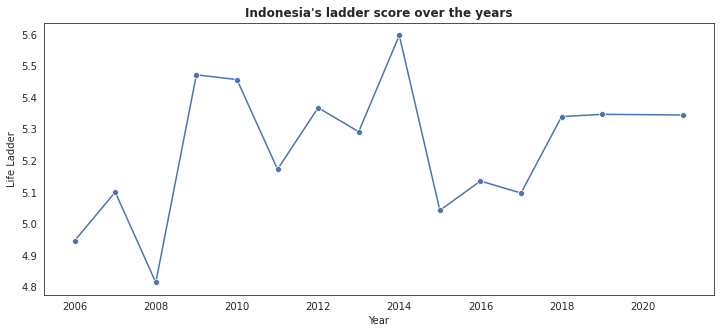

In [ ]:
sns.set({'figure.figsize':(12,5)})
with sns.axes_style('white'):
  sns.lineplot(x='Year', y='Life Ladder', data=happiness_indonesia, marker="o").set_title("Indonesia's ladder score over the years", weight='bold')

#### Insight

Lineplot di atas merepresentasikan bagaimana tangga kehidupan negara Indonesia dari tahun 2006 sampai 2021. Berdasarkan visualisasi tersebut, dapat dilihat bahwa tangga kehidupan terendah untuk Indonesia secara lokal ialah pada tahun 2008 dengan nilai life ladder sebesar 4,815. Sedangkan tangga kehidupan tertinggi untuk Indonesia secara lokal terjadi pada tahun 2014 dengan nilai life ladder sebesar 5,597. Dan untuk saat ini yakni tahun 2021, Indonesia berada di tangga kehidupan menengah dengan nilai life ladder sebesar 5,345.  



# Soal 5: Urutkan Ladder Score tertinggi dengan negara-negara Asia Tenggara 



In [ ]:
#code here
df2_new = df2[['Country name', 'Ladder score', 'Regional indicator']].sort_values(by=['Ladder score'], ascending=False)
highest = df2_new[df2_new['Ladder score'] == df2_new['Ladder score'].max()]
highest_asean = df2_new[df2_new['Regional indicator'] == 'Southeast Asia']
concat_highest = pd.concat([highest, highest_asean])
concat_highest.insert(2, 'Rank', concat_highest.index + 1)
res = concat_highest.reset_index(drop=True)
res = res.drop(columns=['Regional indicator'], axis=1)
res

,Country name,Ladder score,Rank
0,Finland,7.842,1
1,Singapore,6.377,32
2,Thailand,5.985,54
3,Philippines,5.880,61
4,Vietnam,5.411,79
5,Malaysia,5.384,81
6,Indonesia,5.345,82
7,Laos,5.030,100
8,Cambodia,4.830,114
9,Myanmar,4.426,126




---



---



# Soal 6: Visualisasi Scatter plot


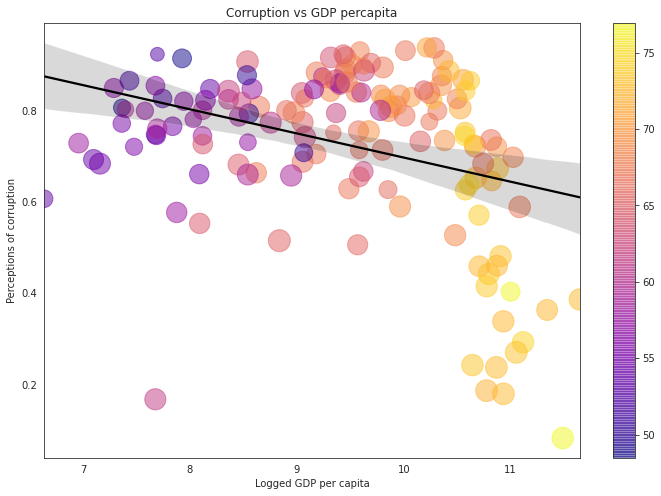

In [ ]:
#code here
with sns.axes_style('white'):
  plt.figure(figsize=(12,8))
  point = plt.scatter(df2['Logged GDP per capita'], df2['Perceptions of corruption'],
                    c=df2['Healthy life expectancy'], s=df2['Freedom to make life choices']*500, cmap="plasma", alpha=0.5)
  plt.colorbar(point)
  sns.regplot(x='Logged GDP per capita', y='Perceptions of corruption', data=df2, 
            scatter_kws={'alpha':0.1}, scatter=False, color='black')
  plt.title('Corruption vs GDP percapita')